In [1]:
# import tensoflow.keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
# from PIL import Image

In [2]:
np.random.seed(1337)

#-- Cargar sólo las imágenes sin las etiquetas ---
(x_train, _), (x_test, _) = mnist.load_data()
input_dim = 28*28

x_train = np.reshape(x_train, [-1, input_dim])/255.0
x_test = np.reshape(x_test,   [-1, input_dim])/255.0

print(x_train.shape,x_test.shape,input_dim)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 784) (10000, 784) 784


In [3]:
# Este es el tamaño de la salida de la red codificadora (o encoder)
encoding_dim = 32  # 32 flotantes -> factor de compresion 24.5, asumiendo una entrada de 28x28=784

##-------- ENCODER ---------------
encoder_input = Input(shape=(input_dim,), name='encoder_input')
code = Dense(encoding_dim, activation='relu', name='latent_vector')(encoder_input)
encoder = Model(encoder_input, code, name='encoder')

##------- DECODER -----------
latent_input = Input(shape=(encoding_dim,), name='decoder_input')
decoded_image = Dense(input_dim,activation="sigmoid",name='decoder_output')(latent_input)
decoder = Model(latent_input, decoded_image, name='decoder')

# Este modelo mapea una entrada en su reconstrucción
autoencoder = Model(encoder_input, decoder(encoder(encoder_input)), name='autoencoder')

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

print(encoder.summary())
print(decoder.summary())
print(autoencoder.summary())

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_vector (Dense)           │ (None, 32)             │        25,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_output (Dense)          │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,872 (101.06 KB)

 Trainable params: 25,872 (101.06 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

None


In [4]:
batch_size = 128
# Entrenando el autoencoder
H = autoencoder.fit(x_train,
                x_train,
                validation_data=(x_test, x_test),
                epochs=50,
                batch_size=batch_size)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3170 - val_loss: 0.1602
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1514 - val_loss: 0.1269
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1240 - val_loss: 0.1118
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1108 - val_loss: 0.1039
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1036 - val_loss: 0.0988
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0991 - val_loss: 0.0958
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0964 - val_loss: 0.0942
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0951 - val_loss: 0.0934
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0947 - val_loss: 0.0930
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0942 - val_loss: 0.0929
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0939 - val_loss: 0.0926
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

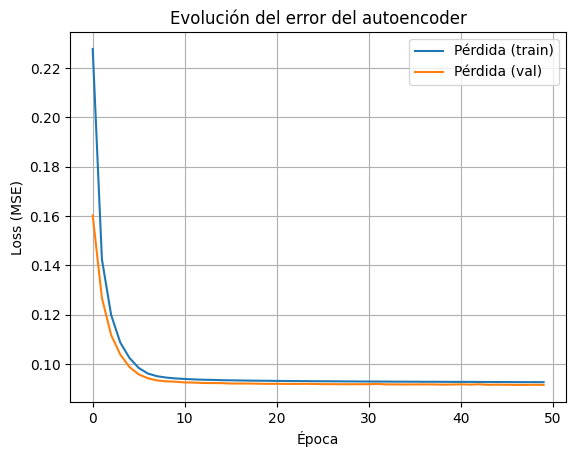

In [5]:
import matplotlib.pyplot as plt

# Graficar la evolución del error
plt.plot(H.history['loss'], label='Pérdida (train)')
plt.plot(H.history['val_loss'], label='Pérdida (val)')
plt.xlabel('Época')
plt.ylabel('Loss (MSE)')
plt.title('Evolución del error del autoencoder')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluar_reconstruccion(autoencoder, datos, nombre=""):
    # Predicción del Autoencoder
    datos_reconstruidos = autoencoder.predict(datos)

    # Aplanar imágenes para comparar
    datos_flat = datos.reshape((datos.shape[0], -1))
    datos_reconstruidos_flat = datos_reconstruidos.reshape((datos_reconstruidos.shape[0], -1))

    # Cálculo de errores
    mse = mean_squared_error(datos_flat, datos_reconstruidos_flat)
    mae = mean_absolute_error(datos_flat, datos_reconstruidos_flat)

    print(f"[{nombre}] MSE: {mse:.6f} | MAE: {mae:.6f}")
    #return mse, mae

# Evaluar en entrenamiento
evaluar_reconstruccion(autoencoder, x_train, nombre="Entrenamiento")

# Evaluar en testeo
evaluar_reconstruccion(autoencoder, x_test, nombre="Testeo")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
[Entrenamiento] MSE: 0.009880 | MAE: 0.033165
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[Testeo] MSE: 0.009634 | MAE: 0.032534


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


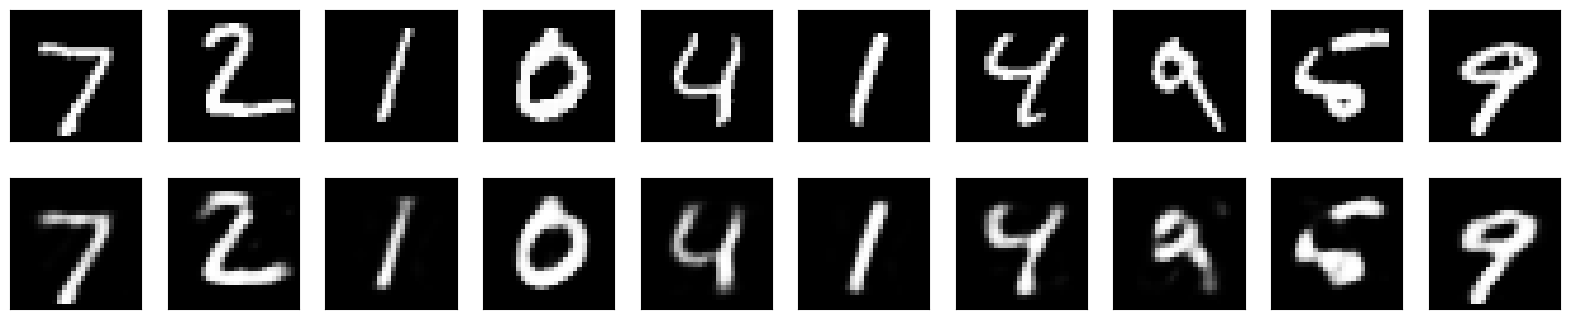

In [7]:
# Codifica y decodifica algunos dígitos
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # Cantidad de dígitos a visualizar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Visualizando la reconstrucción
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


